In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
comcast_data = pd.read_csv('comcast_telecom_complaints_data.csv')

In [3]:
comcast_data.shape

(2224, 11)

In [4]:
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
comcast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Date                           2224 non-null object
Date_month_year                2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [6]:
comcast_data.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [7]:
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [8]:
comcast_data['Date_month_year'] = pd.to_datetime(comcast_data['Date_month_year'])

In [9]:
comcast_data['Month'] = comcast_data['Date_month_year'].dt.month

In [10]:
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5


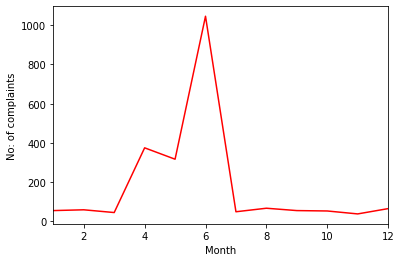

In [11]:
#monthly complaints
comcast_grouped_month = comcast_data.groupby('Month')
comcast_grouped_month['Customer Complaint'].count().plot(kind = 'line', color = 'r')
plt.ylabel('No: of complaints')
plt.show()

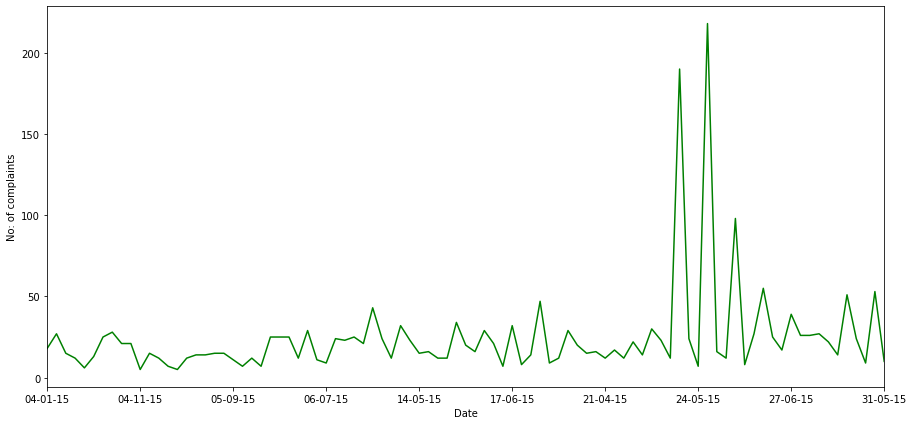

In [12]:
#Daily complaints in abstract
comcast_grouped_month = comcast_data.groupby('Date')
figsize = plt.figure(figsize = (15,7))
comcast_grouped_month['Customer Complaint'].count().plot(kind = 'line', color = 'g')
plt.ylabel('No: of complaints')
plt.show()

In [13]:
complaint_freequency_table = pd.DataFrame(comcast_data['Customer Complaint'].value_counts())
complaint_freequency_table.head()

,Customer Complaint
Comcast,83
Comcast Internet,18
Comcast Data Cap,17
comcast,13
Comcast Billing,11


In [14]:
comcast_data['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [15]:
comcast_data['Status_newformat'] = comcast_data['Status']
comcast_data.loc[comcast_data['Status'] == 'Solved', 'Status_newformat' ] = 'Closed'
comcast_data.loc[comcast_data['Status'] == 'Pending', 'Status_newformat' ] = 'Open'

In [16]:
comcast_data['Status_newformat'].unique()

array(['Closed', 'Open'], dtype=object)

In [17]:
comcast_data.drop('Status',axis = 1, inplace =True)
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Filing on Behalf of Someone,Month,Status_newformat
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,No,4,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,No,8,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Yes,4,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Yes,7,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,No,5,Closed


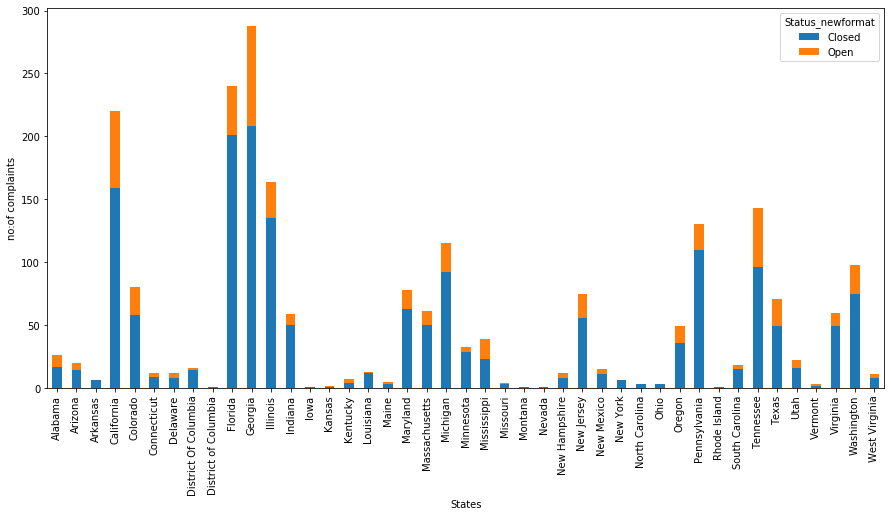

In [18]:
comcast_data_grouped_state = comcast_data.groupby(['State','Status_newformat'])
comcast_data_grouped_state['Status_newformat'].count().unstack().plot(stacked = True, kind = 'bar', figsize = (15,7))
plt.xlabel('States')
plt.ylabel('no:of complaints')
plt.show()

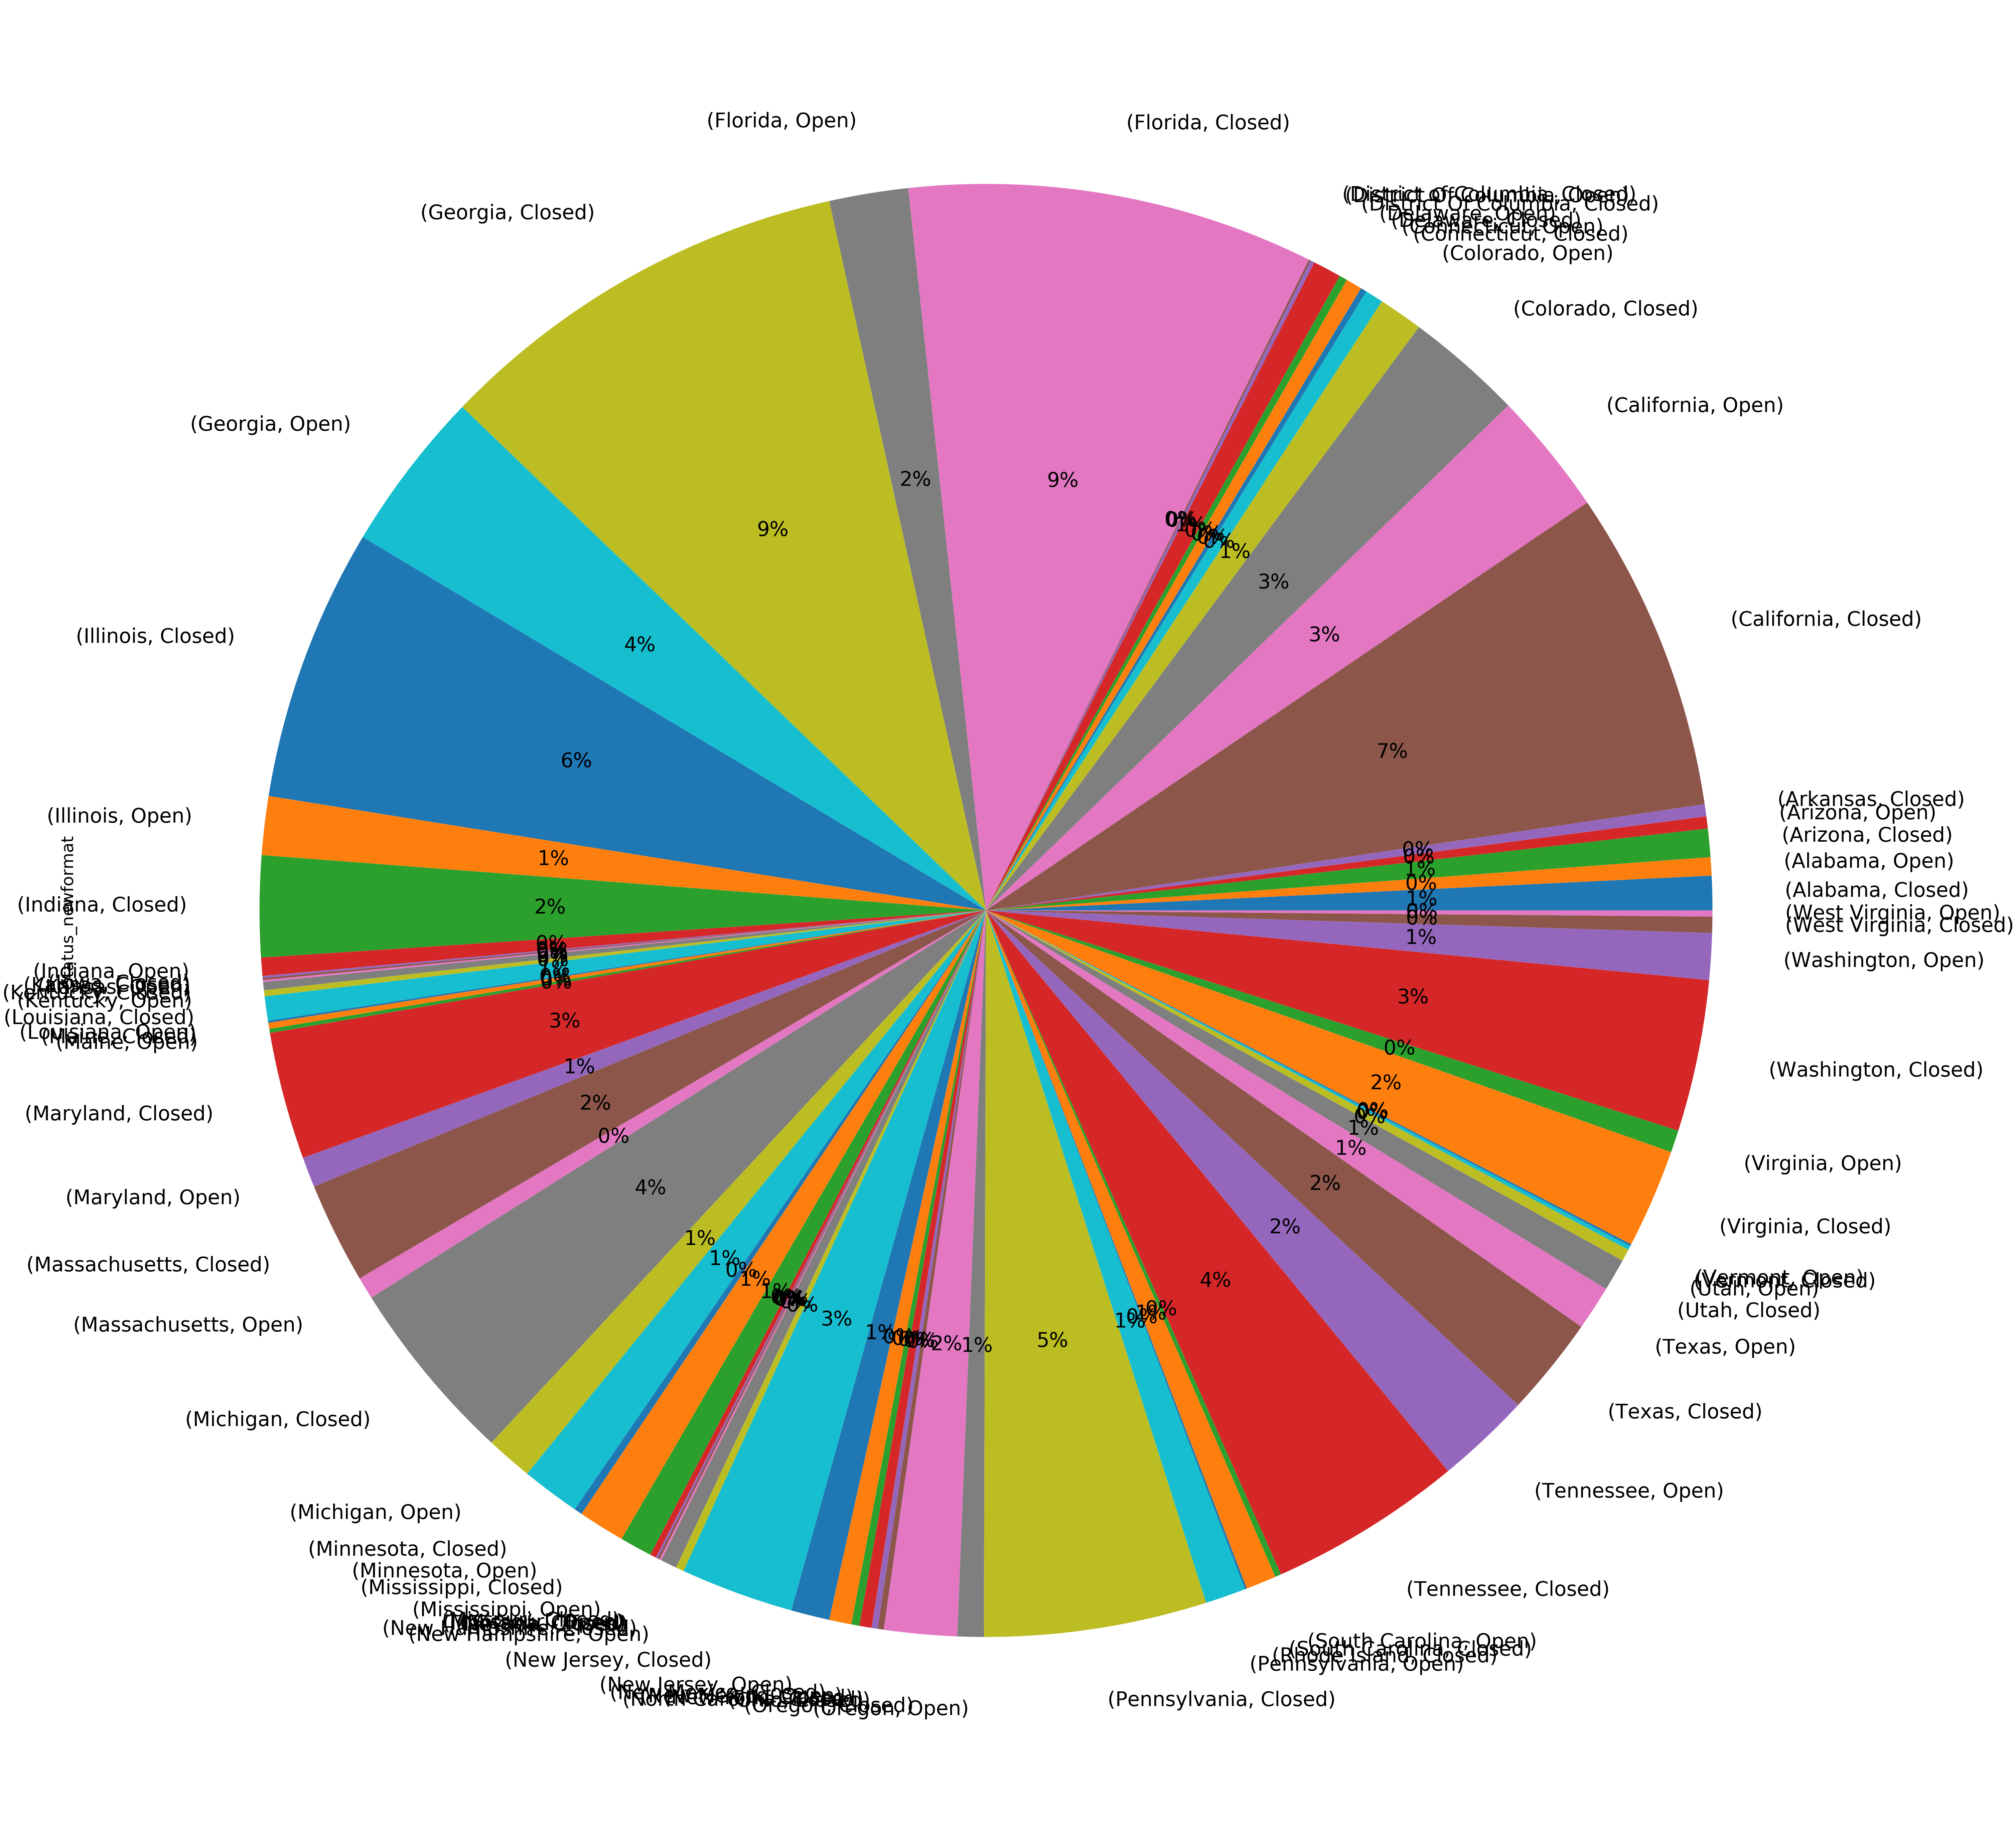

In [19]:
comcast_data_grouped_state = comcast_data.groupby(['State','Status_newformat'])
plt.rcParams['font.size'] = 50
comcast_data_grouped_state['Status_newformat'].count().plot(y = comcast_data_grouped_state['State'], autopct='%.0f%%',
                                                        textprops={'size': 'larger'},kind = 'pie', figsize = (100, 100))
plt.show()

In [20]:
comcast_data_grouped_staus = comcast_data.groupby('Received Via')
comcast_data_grouped_staus['Status_newformat'].value_counts()/comcast_data_grouped_staus['Status_newformat'].count()

Received Via        Status_newformat
Customer Care Call  Closed              0.772118
                    Open                0.227882
Internet            Closed              0.762896
                    Open                0.237104
Name: Status_newformat, dtype: float64

### Inference : Maximum complaints are registered in the state of Georgia
###                    Maximum percentage of unresolved complaints are also in Georgia
###                    Totally 77.2% complaints registered through customer care call and 76.28% complaints registered through internet were solved till date